In [183]:
import cv2
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from tensorflow.keras import backend as k
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Dropout,MaxPooling2D
warnings.filterwarnings("ignore")
# !pip install lxml

In [184]:
np.random.seed(0)
tf.random.set_seed(42)

In [185]:
train_data = pd.read_csv(r'\Users\Family\Downloads\archive (1)\sign_mnist_train.csv')
test_data = pd.read_csv(r'\Users\Family\Downloads\archive (1)\sign_mnist_test.csv')

In [186]:
labels=train_data['label'].values
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

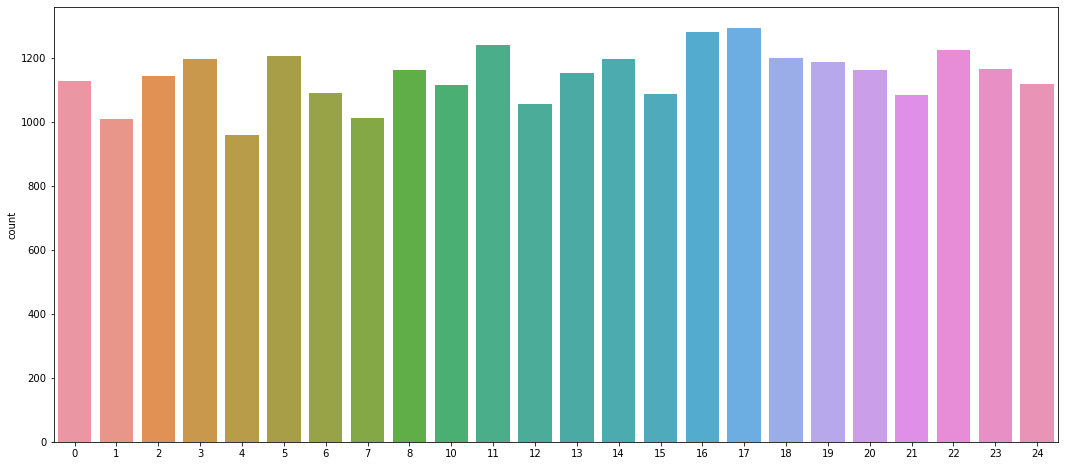

In [187]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [188]:
train_data.drop("label",axis=1,inplace=True)
test_labels = test_data["label"]
test_data.drop('label',axis=1, inplace=True)

In [189]:
images=train_data.values
images=np.array([np.reshape(i,(28,28)) for i in images])
images=np.array([i.flatten() for i in images])

test_images=test_data.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])

In [190]:
labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [191]:
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
test_labels=label_binrizer.fit_transform(test_labels)

In [192]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

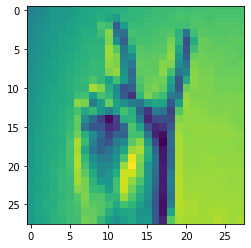

In [193]:
plt.imshow(images[21].reshape(28,28))

In [194]:
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im = images[rand]
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation=cv2.INTER_CUBIC)
    cv2.imshow("Sample Image",sample)
    cv2.waitKey(1000)
cv2.destroyAllWindows()

In [195]:
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)

In [196]:
num_classes=24

In [197]:
x_train=x_train/255
x_test=x_test/255

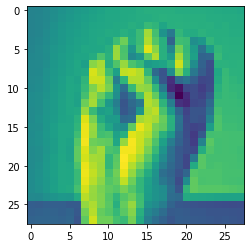

In [198]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[21].reshape(28,28))

In [199]:
model=Sequential()
model.add(Conv2D(128 ,kernel_size=(5,5),
                 strides=1,padding='same', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(3, 3),strides=2,padding='same'))

model.add(Conv2D(64, kernel_size=(2,2), activation = 'relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),2,padding='same'))

model.add(Conv2D(32, kernel_size=(2,2), activation = 'relu',strides=1,padding='same'))
model.add(MaxPooling2D((2,2),2,padding='same'))

model.add(Flatten())
model.add(Dense(units=512, activation = 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))

In [200]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])

In [201]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 4, 4, 32)         

In [202]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15,shuffle=1)

Epoch 1/15
687/687 [==============================] - 42s 58ms/step - loss: 1.1071 - accuracy: 0.6509 - val_loss: 0.1320 - val_accuracy: 0.9607
Epoch 2/15
687/687 [==============================] - 42s 61ms/step - loss: 0.0877 - accuracy: 0.9722 - val_loss: 0.0223 - val_accuracy: 0.9942
Epoch 3/15
687/687 [==============================] - 41s 60ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.0081 - val_accuracy: 0.9993
Epoch 4/15
687/687 [==============================] - 45s 66ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0079 - val_accuracy: 0.9980
Epoch 5/15
687/687 [==============================] - 44s 63ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0036 - val_accuracy: 0.9996
Epoch 6/15
687/687 [==============================] - 45s 65ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 7/15
687/687 [==============================] - 45s 65ms/step - loss: 0.0241 - accuracy: 0.9928 - val_loss: 0.0331 - val_accuracy:

In [203]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print('saved')

saved


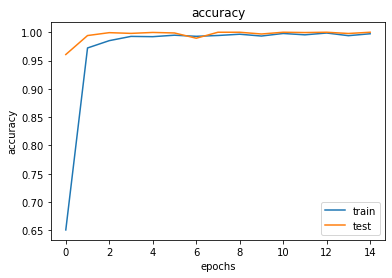

In [204]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [205]:
test_images=test_images.reshape(test_images.shape[0], 28,28,1)
y_pred=model.predict(test_images)

225/225 [==============================] - 3s 15ms/step


In [206]:
accuracy_score(test_labels,y_pred.round())

0.9117401003904071